In [53]:
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sys
sys.path.append("../../src")
from scipy.fft import fft
from FeaturesExtractorFromTSD import create_feature_dict_from_tsd
import matplotlib.pyplot as plt
import statistics
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from   scipy.stats import norm
from   scipy.special import logsumexp
from numpy import inf

In [5]:

path_tds_angles = '../../results/big_dataset/TSD_angles'
folders = [x[0] for x in os.walk(path_tds_angles)]
folders.remove(path_tds_angles)

In [6]:
def smooth_time_series(time_series, window_size):
    smoothed_series = []
    for i in range(len(time_series)):
        lower_bound = max(0, i - window_size)
        upper_bound = min(len(time_series), i + window_size + 1)
        window = time_series[lower_bound:upper_bound]
        average = sum(window) / len(window)
        smoothed_series.append(average)
    return smoothed_series

In [7]:
paths_to_csv = {}

In [8]:
for folder in folders:
    video_name = folder.split('\\')[-1]
    curr_paths_to_csv = [(f[:-4], os.path.join(folder, f)) for f in listdir(folder)]
    paths_to_csv[video_name] = curr_paths_to_csv

In [9]:
names_of_videos = [v for v in paths_to_csv.keys() ]
names_of_videos.sort(key=lambda v: v[::-1])

In [10]:
names_of_videos

['S001C',
 'S002C',
 'S007C',
 'S008C',
 'S009C',
 'S002I',
 'S003I',
 'S005I',
 'S007I',
 'S009I',
 'S001S',
 'S002S',
 'S004S',
 'S007S',
 'S009S']

In [11]:
bow_moving = []
titles = []

In [12]:
for i in range(len(names_of_videos)):
    curr_metric, curr_path = paths_to_csv[names_of_videos[i]][0]
    print(curr_path)
    print(curr_metric)
    title = curr_path.split('/')[-1].split('\\')[1]
    titles.append(title)
    print(title)
    angles = pd.read_csv(curr_path)['angle'].to_list()
    bow_moving.append(angles)

../../results/big_dataset/TSD_angles\S001C\angl_bow_mov.csv
angl_bow_mov
S001C
../../results/big_dataset/TSD_angles\S002C\angl_bow_mov.csv
angl_bow_mov
S002C
../../results/big_dataset/TSD_angles\S007C\angl_bow_mov.csv
angl_bow_mov
S007C
../../results/big_dataset/TSD_angles\S008C\angl_bow_mov.csv
angl_bow_mov
S008C
../../results/big_dataset/TSD_angles\S009C\angl_bow_mov.csv
angl_bow_mov
S009C
../../results/big_dataset/TSD_angles\S002I\angl_bow_mov.csv
angl_bow_mov
S002I
../../results/big_dataset/TSD_angles\S003I\angl_bow_mov.csv
angl_bow_mov
S003I
../../results/big_dataset/TSD_angles\S005I\angl_bow_mov.csv
angl_bow_mov
S005I
../../results/big_dataset/TSD_angles\S007I\angl_bow_mov.csv
angl_bow_mov
S007I
../../results/big_dataset/TSD_angles\S009I\angl_bow_mov.csv
angl_bow_mov
S009I
../../results/big_dataset/TSD_angles\S001S\angl_bow_mov.csv
angl_bow_mov
S001S
../../results/big_dataset/TSD_angles\S002S\angl_bow_mov.csv
angl_bow_mov
S002S
../../results/big_dataset/TSD_angles\S004S\angl_bow_

# Try correlation

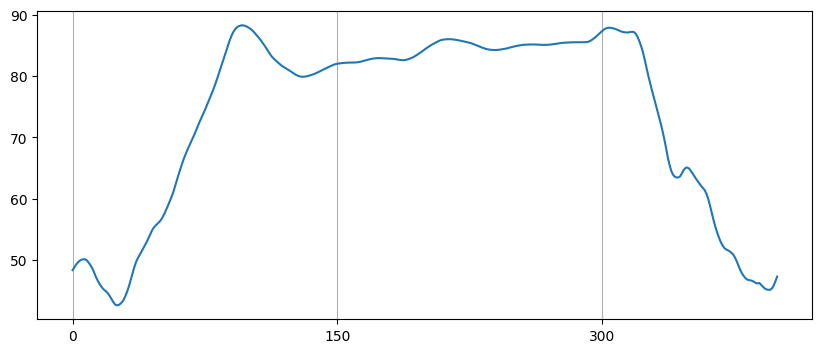

In [269]:
fig, ax = plt.subplots(figsize=(10, 4))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 6400, 150))
ax.xaxis.grid(True)
ax.plot(smooth_time_series(bow_moving[2][450:850], 10));

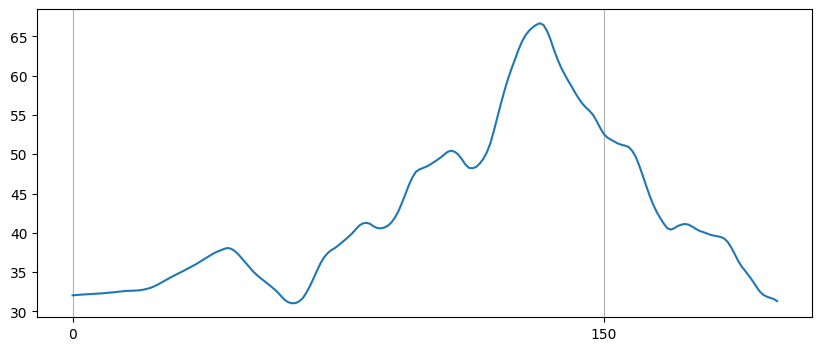

In [242]:
fig, ax = plt.subplots(figsize=(10, 4))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 6400, 150))
ax.xaxis.grid(True)
ax.plot(smooth_time_series(bow_moving[5][4600:4800], 10));

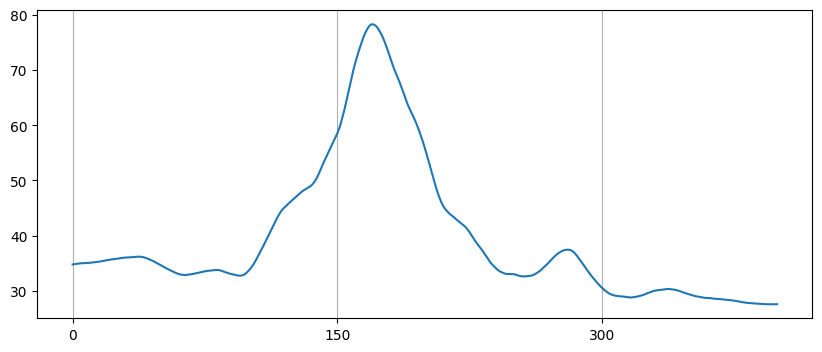

In [255]:
fig, ax = plt.subplots(figsize=(10, 4))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 6400, 150))
ax.xaxis.grid(True)
ax.plot(smooth_time_series(bow_moving[8][4750:5150], 10));

In [270]:
pattern_correct = bow_moving[2][450:850]
pattern_inverted = bow_moving[5][4600:4800]
pattern_inverted2 = bow_moving[8][4750:5150]

In [275]:
def normalize(data):
    data = np.array(smooth_time_series(data, 10))
    return (data - data.mean())/data.std()*10

def num_correlation_points(data, templates):
    correlations = set()
    for template in templates:
        data = normalize(data)
        template  = normalize(template)
        corr_res = np.correlate(data, template,mode='valid')
        th=20000
        #plt.figure(figsize=(40,5))
        #plt.subplot(211)
        #plt.plot(data)
        #plt.subplot(212)
        #plt.plot(corr_res)
        #print(max(corr_res))
        #print(min(corr_res))
        #plt.plot(np.arange(len(corr_res))[corr_res > th],corr_res[corr_res > th],'ro')
        correlations.update(set(10*np.around(corr_res[corr_res > th]/10)))
        #print(len(correlations))
        plt.show()
    return len(correlations)

In [282]:
for i in range(len(bow_moving)):
    print(titles[i])
    if num_correlation_points(bow_moving[i], [ pattern_correct, ]) > 500:
        print('Correct')
    elif num_correlation_points(bow_moving[i], [ pattern_inverted2, ]) > 500:
        print('Inverted')
    else:
        print('Shuffled')
    print('------------')

S001C
Correct
------------
S002C
Correct
------------
S007C
Correct
------------
S008C
Correct
------------
S009C
Correct
------------
S002I
Inverted
------------
S003I
Inverted
------------
S005I
Inverted
------------
S007I
Inverted
------------
S009I
Inverted
------------
S001S
Shuffled
------------
S002S
Shuffled
------------
S004S
Shuffled
------------
S007S
Shuffled
------------
S009S
Shuffled
------------


# Analyse change point detection

In [130]:
# source: https://github.com/gwgundersen/bocd/tree/master
def bocd(data, model, hazard):
    """Return run length posterior using Algorithm 1 in Adams & MacKay 2007.
    """
    # 1. Initialize lower triangular matrix representing the posterior as
    #    function of time. Model parameters are initialized in the model class.
    #
    #    When we exponentiate R at the end, exp(-inf) --> 0, which is nice for
    #    visualization.
    #
    T           = len(data)
    log_R       = -np.inf * np.ones((T+1, T+1))
    log_R[0, 0] = 0              # log 0 == 1
    pmean       = np.empty(T)    # Model's predictive mean.
    pvar        = np.empty(T)    # Model's predictive variance.
    log_message = np.array([0])  # log 0 == 1
    log_H       = np.log(hazard)
    log_1mH     = np.log(1 - hazard)

    for t in range(1, T+1):
        # 2. Observe new datum.
        x = data[t-1]

        # Make model predictions.
        pmean[t-1] = np.sum(np.exp(log_R[t-1, :t]) * model.mean_params[:t])
        pvar[t-1]  = np.sum(np.exp(log_R[t-1, :t]) * model.var_params[:t])

        # 3. Evaluate predictive probabilities.
        log_pis = model.log_pred_prob(t, x)

        # 4. Calculate growth probabilities.
        log_growth_probs = log_pis + log_message + log_1mH

        # 5. Calculate changepoint probabilities.
        log_cp_prob = logsumexp(log_pis + log_message + log_H)

        # 6. Calculate evidence
        new_log_joint = np.append(log_cp_prob, log_growth_probs)

        # 7. Determine run length distribution.
        log_R[t, :t+1]  = new_log_joint
        log_R[t, :t+1] -= logsumexp(new_log_joint)

        # 8. Update sufficient statistics.
        model.update_params(t, x)

        # Pass message.
        log_message = new_log_joint

    R = np.exp(log_R)
    return R, pmean, pvar


# -----------------------------------------------------------------------------


class GaussianUnknownMean:

    def __init__(self, mean0, var0, varx):
        """Initialize model.

        meanx is unknown; varx is known
        p(meanx) = N(mean0, var0)
        p(x) = N(meanx, varx)
        """
        self.mean0 = mean0
        self.var0  = var0
        self.varx  = varx
        self.mean_params = np.array([mean0])
        self.prec_params = np.array([1/var0])

    def log_pred_prob(self, t, x):
        """Compute predictive probabilities \pi, i.e. the posterior predictive
        for each run length hypothesis.
        """
        # Posterior predictive: see eq. 40 in (Murphy 2007).
        post_means = self.mean_params[:t]
        post_stds  = np.sqrt(self.var_params[:t])
        return norm(post_means, post_stds).logpdf(x)

    def update_params(self, t, x):
        """Upon observing a new datum x at time t, update all run length
        hypotheses.
        """
        # See eq. 19 in (Murphy 2007).
        new_prec_params  = self.prec_params + (1/self.varx)
        self.prec_params = np.append([1/self.var0], new_prec_params)
        # See eq. 24 in (Murphy 2007).
        new_mean_params  = (self.mean_params * self.prec_params[:-1] + \
                            (x / self.varx)) / new_prec_params
        self.mean_params = np.append([self.mean0], new_mean_params)

    @property
    def var_params(self):
        """Helper function for computing the posterior variance.
        """
        return 1./self.prec_params + self.varx

# -----------------------------------------------------------------------------

def generate_data(varx, mean0, var0, T, cp_prob):
    """Generate partitioned data of T observations according to constant
    changepoint probability `cp_prob` with hyperpriors `mean0` and `prec0`.
    """
    data  = []
    cps   = []
    meanx = mean0
    for t in range(0, T):
        if np.random.random() < cp_prob:
            meanx = np.random.normal(mean0, var0)
            cps.append(t)
        data.append(np.random.normal(meanx, varx))
    return data, cps


# -----------------------------------------------------------------------------

def plot_posterior(T, data, cps, R, pmean, pvar):
    fig, axes = plt.subplots(2, 1, figsize=(20,10))

    ax1, ax2 = axes

    ax1.scatter(range(0, T), data)
    ax1.plot(range(0, T), data)
    ax1.set_xlim([0, T])
    ax1.margins(0)

    # Plot predictions.
    ax1.plot(range(0, T), pmean, c='k')
    _2std = 2 * np.sqrt(pvar)
    ax1.plot(range(0, T), pmean - _2std, c='k', ls='--')
    ax1.plot(range(0, T), pmean + _2std, c='k', ls='--')

    ax2.imshow(np.rot90(R), aspect='auto', cmap='gray_r',
               norm=LogNorm(vmin=0.0001, vmax=1))
    ax2.set_xlim([0, T])
    ax2.margins(0)

    for cp in cps:
        ax1.axvline(cp, c='red', ls='dotted')
        ax2.axvline(cp, c='red', ls='dotted')

    plt.tight_layout()
    plt.show()

def get_cp_from_R(R):
    num_col = len(R[0])
    num_row = len(R)
    cps = set()
    R_prep = abs(np.log(R))
    R_prep[R_prep == inf] = 0
    for r in range(num_row):
        for c in [1,]:
        #if R[r][c] >0.1 and R[r+1][c+1]==0:
        #   cps.append(r+1)
        #for i in range(len(R[2])):
            if R_prep[r][c]>0:
                cps.add(r)

    cps_cleaned = []
    for c in cps:
        if c-1 not in cps:
            cps_cleaned.append(c)
    return cps_cleaned

def get_cp_from_R(R):
    num_col = len(R[0])
    num_row = len(R)
    cps = set()
    R_prep = abs(np.log(R))
    R_prep[R_prep == inf] = 0
    for r in range(num_row-1):
        for c in [20,]:
        #for c in range(num_col-1):
            #if R_prep[r][c]>600 and R_prep[r+1][c+1]==0:
                #cps.add(r+1)
        #for i in range(len(R[2])):
            if R_prep[r][c]>0:
                cps.add(r-20)

    cps_cleaned = []
    for c in cps:
        if c-1 not in cps:
            cps_cleaned.append(c)
    return cps_cleaned
# -----------------------------------------------------------------------------
def calculate_num_cp(tsd):

    data = bow_moving[0]#[:1000]
    cps=[]
    T      = len(data)   # Number of observations.
    hazard = 1/100  # Constant prior on changepoint probability.
    mean0  = 20      # The prior mean on the mean parameter.
    var0   = 1  # The prior variance for mean parameter.
    varx= 1   # The known variance of the data.

    #data, cps      = generate_data(varx, mean0, var0, T, hazard)
    scaler = MinMaxScaler(feature_range=(0, 100))

    values = smooth_time_series(data, 5)
    values = np.array(values).reshape((len(values), 1))
    scaler = scaler.fit(values)
    data_norm = scaler.transform(values).reshape(len(values)).tolist()
    model          = GaussianUnknownMean(mean0, var0, varx)
    R, pmean, pvar = bocd(data_norm, model, hazard)
    cps = get_cp_from_R(R)
    #print(cps)

    #plot_posterior(T, data_norm, cps, R, pmean, pvar)

    return len(cps)

In [132]:
for i in range(len(bow_moving)):
    tsd_bow = bow_moving[i]
    print(f'{titles[i]}: {1000*calculate_num_cp(tsd_bow)/len(tsd_bow)}')

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S001C: 13.28996282527881


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S002C: 13.368234084322708


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S007C: 12.875922924545291


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S008C: 14.445903626628953


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S009C: 16.141776724235243


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S002I: 13.647642679900745


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S003I: 13.159105548909542


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S005I: 10.787567893783947


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log


S007I: 13.852562239659013


KeyboardInterrupt: 

In [29]:
abs(np.log(R))

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[0.00000000e+00,            inf,            inf, ...,
                   inf,            inf,            inf],
       [4.60517019e+00, 1.00503359e-02,            inf, ...,
                   inf,            inf,            inf],
       [4.60517019e+00,            inf, 1.00503359e-02, ...,
                   inf,            inf,            inf],
       ...,
       [4.60517019e+00, 2.64821830e+02, 3.16392529e+02, ...,
                   inf,            inf,            inf],
       [4.60517019e+00, 2.61435916e+02, 3.14336549e+02, ...,
                   inf,            inf,            inf],
       [4.60517019e+00, 2.37035267e+02, 2.96724459e+02, ...,
                   inf,            inf,            inf]])

In [24]:
R[]

array([0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

In [82]:
abs(np.log(R))[400:450]?

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[  2.30258509,          inf,          inf, ...,          inf,
                 inf,          inf],
       [  2.30258509,          inf,          inf, ...,          inf,
                 inf,          inf],
       [  2.30258509,          inf,          inf, ...,          inf,
                 inf,          inf],
       ...,
       [  2.30258509, 400.48182913, 495.20510262, ...,          inf,
                 inf,          inf],
       [  2.30258509, 433.13456806, 525.55846033, ...,          inf,
                 inf,          inf],
       [  2.30258509, 459.75687582, 550.34990738, ...,          inf,
                 inf,          inf]])

In [83]:
abs(np.log(R))

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[ 0.        ,         inf,         inf, ...,         inf,
                inf,         inf],
       [ 2.30258509,  0.10536052,         inf, ...,         inf,
                inf,         inf],
       [ 2.30258509,         inf,  0.10536052, ...,         inf,
                inf,         inf],
       ...,
       [ 2.30258509, 10.4107559 ,  5.85116953, ...,         inf,
                inf,         inf],
       [ 2.30258509, 16.67721513, 14.76716448, ...,         inf,
                inf,         inf],
       [ 2.30258509, 22.2832791 , 24.17970935, ...,         inf,
                inf,         inf]])

In [112]:
R_prep = abs(np.log(R))
R_prep[R_prep == inf] = 0

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [113]:
R_prep

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.60517019e+00, 1.00503359e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.60517019e+00, 1.09493693e+02, 1.00503359e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.60517019e+00, 9.25563394e+00, 1.11122717e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.60517019e+00, 8.84282480e+00, 1.05907515e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.60517019e+00, 8.51267957e+00, 1.00932180e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [71]:
scaler = MinMaxScaler(feature_range=(0, 1))
values = data
values = np.array(values).reshape((len(values), 1))
scaler = scaler.fit(values)
data_norm = scaler.transform(values).reshape(len(values)).tolist()

In [72]:
data_norm

[0.9847543536699459,
 0.9785353571956796,
 0.9901792211568674,
 0.9916998817812754,
 0.9937380067375181,
 0.9926663979944517,
 0.9943082260013241,
 0.9983082404325436,
 1.0,
 0.9995632465594191,
 0.9989535372358753,
 0.9948213848712746,
 0.9949250657895641,
 0.9942939741974548,
 0.993602402890323,
 0.991622104144823,
 0.9925525262262822,
 0.9933343397379977,
 0.9937461725300922,
 0.9941675059802637,
 0.9935894846273767,
 0.9922031170520551,
 0.9895966809443584,
 0.9869742570205702,
 0.9813255286663027,
 0.9766535086994916,
 0.9766005058885345,
 0.9749716198485503,
 0.9743883863405745,
 0.9740714018256036,
 0.9729101064890113,
 0.970279022420435,
 0.9665093776090503,
 0.9604326989954357,
 0.9523306162466445,
 0.9437606007520387,
 0.9354110137635592,
 0.9238121945137272,
 0.9123191498349077,
 0.8976016874664854,
 0.8817754070534658,
 0.8766867060432979,
 0.8719019241013912,
 0.8688487855377645,
 0.8650303448978771,
 0.863526420153369,
 0.8615676502778575,
 0.8598303326104115,
 0.85864105